In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Pendulum-v0')
env._max_episode_steps = 600

In [2]:
def muestra_entorno(env):
    im = plt.imshow(env.render('rgb_array'))
    plt.show()

def get_random_state():
    angle = np.random.uniform(0,360)
    return [np.cos(angle), np.sin(angle), np.random.uniform(-8,8)]

# Discretizamos la acción de rango entre -2 y 2 en 40 valores

# def discretize_action(action):
#     return int(action/0.1)/10

def discretize_state(state):
    return [int(state[0]/0.1)/10, int(state[1]/0.1)/10, int(state[2]/0.1)/10]

In [19]:
# random state cos, sen y thetadot
env.reset()

array([-0.43490051, -0.90047851,  0.99956873])

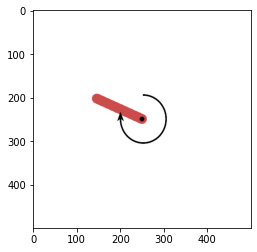

In [3]:
env.reset()

muestra_entorno(env)

env.close()

In [4]:
env.step([0.1, 0.1, -3.4])

env.state

array([1.21950053, 1.47863665])

In [5]:
sample = env.action_space.sample()
observation, reward, done, info = env.step(sample)
print(f"Acción tomada: {sample} \n Estado: {observation} \n Reward: {reward} \n Hecho?: {done}")

Acción tomada: [1.8441327] 
 Estado: [0.22634454 0.9740473  2.45945225] 
 Reward: -1.7092190078629195 
 Hecho?: False


In [6]:
for i_episode in range(20):
    observation = env.reset()
    for t in range(10):
        env.render()
        # print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

In [7]:
# cos(theta), sin(angle), velocity
print(env.observation_space.high, env.observation_space.low)

env.close()

[1. 1. 8.] [-1. -1. -8.]


In [8]:
env.render()
next_state, reward, done, info = env.step([-2])
env.render()

angle = next_state[0]
vel = next_state[2]

print(f"Seno del ángulo: {round(angle,6)} \t Ángulo en radianes: {round(np.arccos(angle), 6)}")

Seno del ángulo: -0.175558 	 Ángulo en radianes: 1.747269


In [19]:
def get_estado(env, action):
    next_state, _, _, _ = env.step([action])
    return next_state[0], next_state[2]

def discretize_state(state):
    angle_bins = np.linspace(-1, 1, 40)
    vel_bins = np.linspace(-8, 8, 160)

    return [np.digitize([state[0]], angle_bins)[0]-1, np.digitize([state[1]], vel_bins)[0]-1]


discretize_state([-0.9561006691994655, 0.263761426149805, -0.09901058240783572])

[0, 82]

In [21]:
env.reset()
env.seed(123)
env._max_episode_steps = 600

def get_epsilon_greedy_action(q_values, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(10)
    else:
        return np.argmax(q_values)


def sarsa(num_episodes = 20, ALPHA = 0.1, GAMMA = 1, EPSILON = 0.25):
    acciones = np.linspace(-2,2,10)
    q_values = np.zeros((40, 160, 10))
          
    for i in range(num_episodes):
        s = discretize_state(env.reset())
        a = get_epsilon_greedy_action(q_values[s[0],s[1]], EPSILON)
        returns, num_steps, done = 0, 0, False

        while not done:
            env.render()
            next_state, reward, done, _ = env.step([acciones[a]])
            # print(get_estado(env, acciones[a]))
            # next_state = discretize_state(get_estado(env, acciones[a]))
            # next_state = discretize_state(env.state)
            next_state = discretize_state(next_state)
            a_prime = get_epsilon_greedy_action(q_values[next_state[0],next_state[1]], EPSILON)
            q_values[s[0], s[1], a] = q_values[s[0], s[1], a] + ALPHA * (reward + GAMMA * q_values[next_state[0], next_state[1], a_prime] - q_values[s[0], s[1], a])
            # print(q_values)
            s, a = next_state,  a_prime
            num_steps += 1
            returns += reward

        print(f'Terminado episodio {i} con retorno {returns} en {num_steps} pasos')
    env.close()
    # return q_values
            
sarsa()

Terminado episodio 0 con retorno -3337.547775013633 en 600 pasos
Terminado episodio 1 con retorno -4030.7380080050025 en 600 pasos
Terminado episodio 2 con retorno -4429.990815866715 en 600 pasos
Terminado episodio 3 con retorno -4862.637887297102 en 600 pasos
Terminado episodio 4 con retorno -3171.2838490902304 en 600 pasos


In [18]:
env.close()

In [14]:
acciones = np.linspace(-2,2,30)

discretize_state(get_estado(env, acciones[29]))

NameError: name 'get_estado' is not defined